Começamos importanto as bibliotecas necessarias.
Neste caso, apenas matplotlib para plotagem gráfica

In [1]:
import matplotlib.pyplot as plt  # Biblioteca para plotagem

Agora suponha que foi realizado um experimento, e foram amostrados
valores y_i em diferentes instantes x_i, formando pares de (x_i,y_i)

In [2]:
pares_xy = [
    # (x_i, y_i),
    (3,   1),
    (21, 10),
    (22, 14),
    (34, 34),
    (54, 44),
    (34, 36),
    (55, 22),
    (67, 67),
    (89, 79),
    (99, 90)
    ]

Para simplificar as plotagens, podemos agrupar os valores de x e y separadamente

Text(0, 0.5, 'Valores Y')

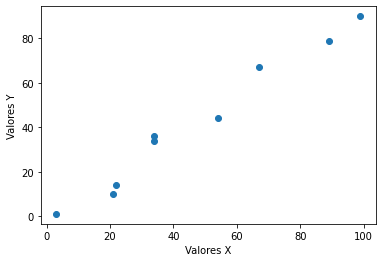

In [3]:
# Separa os x e os y em listas diferentes
x = [par[0] for par in pares_xy]
y = [par[1] for par in pares_xy]

plt.scatter(x, y)
plt.xlabel("Valores X")
plt.ylabel("Valores Y")

Visualmente, a função y(x) se assemelha a uma função linear descrita por y(x) = a*x + b

In [4]:
def funcao_linear(a, b, x):
    return a*x + b

Para descobrirmos a melhor aproximação de 'a' e 'b', precisamos de uma métrica de proximidade.
Uma das possíveis métricas é o método dos mínimos quadrados

In [5]:
def residuo_metodo_minimos_quadrados(y_medido, y_aproximado):
    residuo = 0
    for i in range(len(y_medido)):
        residuo += (y_medido[i]-y_aproximado[i])**2
    return residuo

Agora podemos testar iterativamente diferentes valores de 'a' e 'b', afim de minimizar o resíduo acima

Iteração 0: a=0.865, b=0.870, residuo 262.2
Iteração 1: a=0.866, b=0.870, residuo 260.8
Iteração 2: a=0.867, b=0.870, residuo 259.5
Iteração 3: a=0.868, b=0.870, residuo 258.3
Iteração 4: a=0.868, b=0.870, residuo 257.1
Iteração 5: a=0.869, b=0.870, residuo 256.1
Iteração 6: a=0.870, b=0.870, residuo 255.1
Iteração 7: a=0.871, b=0.870, residuo 254.1
Iteração 8: a=0.871, b=0.870, residuo 253.2
Iteração 9: a=0.872, b=0.870, residuo 252.4
Iteração 10: a=0.873, b=0.870, residuo 251.6
Iteração 11: a=0.873, b=0.870, residuo 250.9
Iteração 12: a=0.874, b=0.870, residuo 250.2
Iteração 13: a=0.875, b=0.870, residuo 249.6
Iteração 14: a=0.875, b=0.870, residuo 249.0
Iteração 15: a=0.876, b=0.870, residuo 248.4
Iteração 16: a=0.876, b=0.870, residuo 247.9
Iteração 17: a=0.877, b=0.870, residuo 247.4
Iteração 18: a=0.877, b=0.870, residuo 246.9
Iteração 19: a=0.878, b=0.870, residuo 246.5
Iteração 20: a=0.878, b=0.870, residuo 246.1
Iteração 21: a=0.879, b=0.870, residuo 245.7
Iteração 22: a=0.879

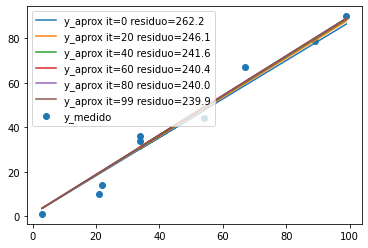

In [6]:
def gera_y_aproximado(a,b,x_medido):
    numeros = len(x_medido)
    y_aproximado = []
    # Para cada x_i, gera o valor aproximado de y_i(x_i) = a*x_i + b
    for i in range(numeros):
        y_aproximado.append(funcao_linear(a,b,x_medido[i]))
    return y_aproximado

def iteracao(a, b, x_medido, y_medido, taxa_aprendizagem):
    numeros = len(y_medido)

    y_aproximado = gera_y_aproximado(a,b,x_medido)

    # Calcula o ajuste para parâmetros 'a' e 'b'
    residuo_a = sum([(y_aproximado[i]-y_medido[i])*x_medido[i] for i in range(numeros)])/numeros
    residuo_b = sum([(y_aproximado[i]-y_medido[i]) for i in range(numeros)])/numeros

    # Retorna os valores de 'a' e 'b' ajustados
    a = a - taxa_aprendizagem*residuo_a
    b = b - taxa_aprendizagem*residuo_b

    return a,b

def minimizacao_residuo(x_medido, y_medido, taxa_aprendizagem, iteracoes=100):
    # Escolhemos 'a' e 'b' iniciais aleatoriamente
    import random
    a = random.random()
    b = random.random()

    # Depois executamos uma série de iterações,
    # ajustando os valores de 'a' e 'b' progressivamente
    for it in range(iteracoes):
        a, b = iteracao(a,b,x_medido,y_medido,taxa_aprendizagem)

        y_aproximado = gera_y_aproximado(a,b,x_medido)
        residuo = residuo_metodo_minimos_quadrados(y_medido, y_aproximado)
        print("Iteração %d: a=%.3f, b=%.3f, residuo %.1f" % (it, a, b, residuo))

        if it % int(iteracoes/5) == 0 or it == (iteracoes-1):
            plt.plot(x_medido, y_aproximado, label="y_aprox it=%d residuo=%.1f" % (it, residuo))

    plt.scatter(x_medido, y_medido, label="y_medido")
    plt.legend()

minimizacao_residuo(x,y, 1e-5)

E o que acontece se fizermos um ajuste mais fino? Ou seja, com menor taxa de aprendizagem?
Precisaremos de mais iterações para convergir para o resultado final, porém conseguimos valores mais precisos.

Iteração 0: a=0.818, b=0.958, residuo 394.7
Iteração 1: a=0.819, b=0.958, residuo 393.7
Iteração 2: a=0.819, b=0.958, residuo 392.8
Iteração 3: a=0.819, b=0.958, residuo 391.8
Iteração 4: a=0.819, b=0.958, residuo 390.9
Iteração 5: a=0.819, b=0.958, residuo 390.0
Iteração 6: a=0.820, b=0.958, residuo 389.0
Iteração 7: a=0.820, b=0.958, residuo 388.1
Iteração 8: a=0.820, b=0.958, residuo 387.2
Iteração 9: a=0.820, b=0.958, residuo 386.3
Iteração 10: a=0.821, b=0.958, residuo 385.3
Iteração 11: a=0.821, b=0.958, residuo 384.4
Iteração 12: a=0.821, b=0.958, residuo 383.5
Iteração 13: a=0.821, b=0.958, residuo 382.7
Iteração 14: a=0.822, b=0.958, residuo 381.8
Iteração 15: a=0.822, b=0.958, residuo 380.9
Iteração 16: a=0.822, b=0.958, residuo 380.0
Iteração 17: a=0.822, b=0.958, residuo 379.1
Iteração 18: a=0.822, b=0.958, residuo 378.3
Iteração 19: a=0.823, b=0.958, residuo 377.4
Iteração 20: a=0.823, b=0.958, residuo 376.6
Iteração 21: a=0.823, b=0.958, residuo 375.7
Iteração 22: a=0.823

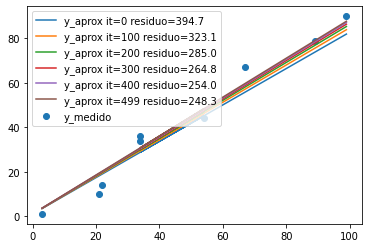

In [7]:
minimizacao_residuo(x,y, 1e-6, iteracoes=500)

E se quisermos acelerar o processo aumentando a taxa de aprendizado?
O ajuste pode ser grande demais, fazendo com que a busca da melhor aproximação divirja, se afaste, do resultado desejado.

Iteração 0: a=0.716, b=0.877, residuo 1128.0
Iteração 1: a=1.274, b=0.884, residuo 4356.8
Iteração 2: a=0.073, b=0.865, residuo 19327.1
Iteração 3: a=2.659, b=0.902, residuo 88737.5
Iteração 4: a=-2.909, b=0.818, residuo 410559.8
Iteração 5: a=9.080, b=0.996, residuo 1902692.8
Iteração 6: a=-16.735, b=0.610, residuo 8820986.7
Iteração 7: a=38.851, b=1.437, residuo 40897744.9
Iteração 8: a=-80.839, b=-0.349, residuo 189622044.8
Iteração 9: a=176.884, b=3.493, residuo 879184164.6


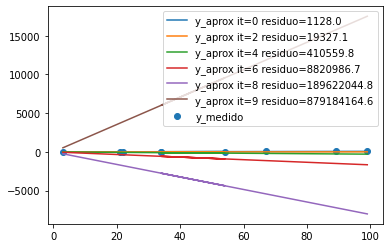

In [8]:
minimizacao_residuo(x, y, 1e-3, iteracoes=10)